# 编码器-解码器架构
机器翻译是序列转换模型的一个核心问题， 其输入和输出都是长度可变的序列。 

为了处理这种类型的输入和输出， 我们可以设计一个包含两个主要组件的架构： 第一个组件是一个


编码器（encoder）： 它接受一个长度可变的序列作为输入， 并将其转换为具有固定形状的编码状态。

解码器（decoder）： 它将固定形状的编码状态映射到长度可变的序列

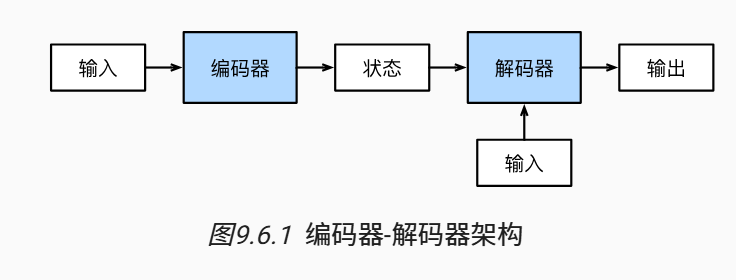

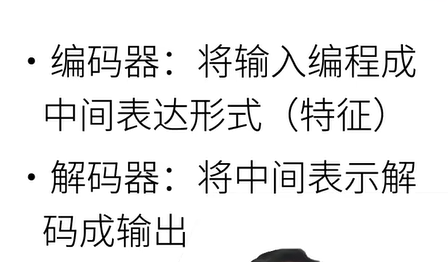

例子：
 给定一个英文的输入序列：“They”“are”“watching”“.”。
 
 “编码器－解码器”架构将长度可变的输入序列编码成一个“状态”， 然后对该状态进行解码， 一个词元接着一个词元地生成翻译后的序列作为输出： “Ils”“regordent”“.”。 由于“编码器－解码器”架构是形成后续章节中不同序列转换模型的基础
 
 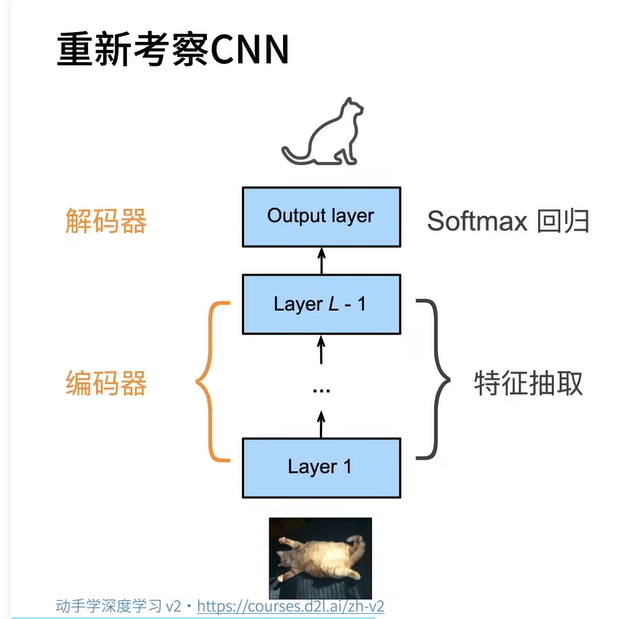
 
 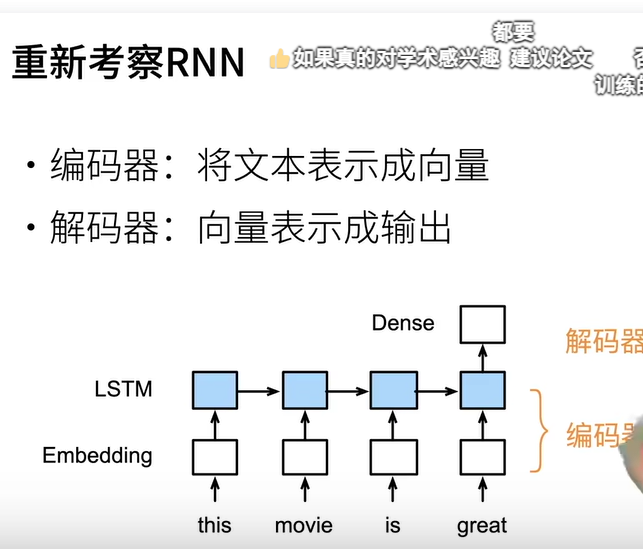
 
 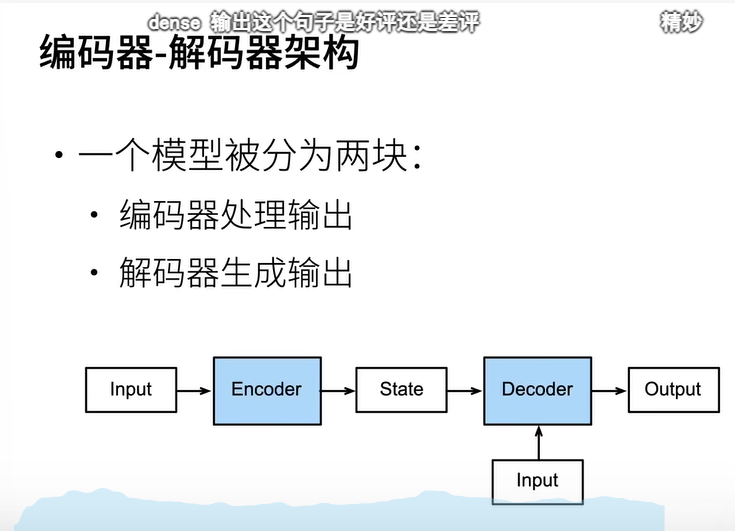
 
 
 编码器 把人能看懂的信息变成计算机可以get到的信息，解码器，计算机把读取到的信息解码成人能看懂的，人和计算机交流的方式
 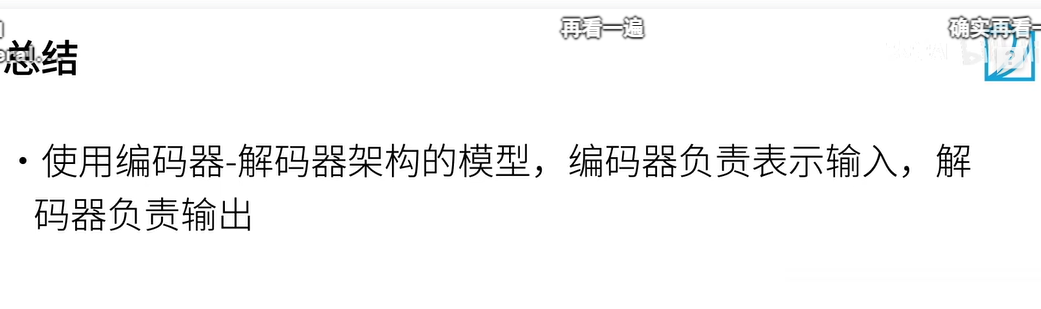
 
 

In [2]:
# 编码器


from torch import nn


#@save
class Encoder(nn.Module):
    """编码器-解码器架构的基本编码器接口"""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError

In [3]:
#解码器

# @save 表示在 d2l 库中保存这段代码
class Decoder(nn.Module):
    """编码器-解码器架构的基本解码器接口"""
    
    def __init__(self, **kwargs):
        # 调用父类 nn.Module 的构造函数进行初始化
        super(Decoder, self).__init__(**kwargs)

    def init_state(self, enc_outputs, *args):
        """根据编码器的输出初始化解码器的内部状态"""
        raise NotImplementedError  # 此方法尚未实现，需在子类中重写

    def forward(self, X, state):
        """解码器前向传播的钩子函数
        X: 输入序列
        state: 解码器的状态
        """
        raise NotImplementedError  # 此方法尚未实现，需在子类中重写

In [4]:
# 合并编码器和解码器
# @save 表示在 d2l 库中保存这段代码
class EncoderDecoder(nn.Module):
    """编码器-解码器架构的基类"""
    
    def __init__(self, encoder, decoder, **kwargs):
        # 调用父类 nn.Module 的构造函数进行初始化
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder  # 初始化编码器
        self.decoder = decoder  # 初始化解码器

    def forward(self, enc_X, dec_X, *args):
        """前向传播函数
        enc_X: 编码器的输入序列
        dec_X: 解码器的输入序列
        args: 其他可选参数
        """
        # 使用编码器处理输入数据，得到编码器的输出
        enc_outputs = self.encoder(enc_X, *args)
        
        # 根据编码器的输出初始化解码器的状态
        dec_state = self.decoder.init_state(enc_outputs, *args)
        
        # 使用解码器进行前向传播并返回结果
        return self.decoder(dec_X, dec_state)